In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt


In [2]:
isCuda = torch.cuda.is_available()
device = torch.device('cuda' if isCuda else 'cpu')

print(f'Current cuda device is {device}')


Current cuda device is cpu


In [3]:
BatchSize = 50
EpochNum = 15
LearningRate = 0.0001

trainData = datasets.MNIST(root = './data', train = True, download = True,
	transform = transforms.ToTensor())
testData = datasets.MNIST(root = './data', train = False, download = True,
	transform = transforms.ToTensor())

print(f'number of training data: {len(trainData)}')
print(f'number of test data: {len(testData)}')


number of training data: 60000
number of test data: 10000


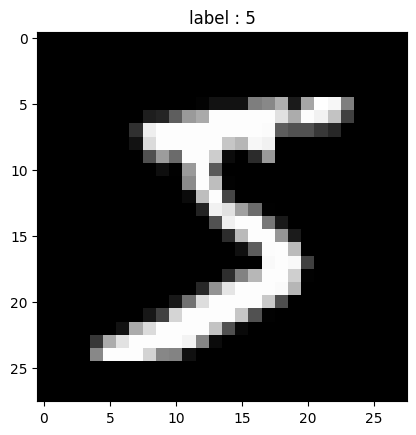

In [4]:
image, label = trainData[0]
plt.imshow(image.squeeze().numpy(), cmap = 'gray')
plt.title(f'label : {label}')
plt.show()


In [5]:
trainLoader = torch.utils.data.DataLoader(dataset = trainData,
	batch_size = BatchSize, shuffle = True)
testLoader = torch.utils.data.DataLoader(dataset = testData,
	batch_size = BatchSize, shuffle = True)


In [6]:
class CNN(nn.Module):
	def __init__(self):
		super(CNN, self).__init__()
		self.conv1 = nn.Conv2d(1, 8, 3, 1)
		self.conv2 = nn.Conv2d(8, 16, 3, 1)
		self.dropout1 = nn.Dropout(0.25)
		self.dropout2 = nn.Dropout(0.5)
		self.fc1 = nn.Linear(2304, 256)
		self.fc2 = nn.Linear(256, 10)
	def forward(self, x):
		x = self.conv1(x)
		x = F.relu(x)
		x = self.conv2(x)
		x = F.relu(x)
		x = F.max_pool2d(x, 2)
		x = self.dropout1(x)
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = F.relu(x)
		x = self.dropout2(x)
		x = self.fc2(x)
		output = F.log_softmax(x, dim = 1)
		return output


In [7]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = LearningRate)
criterion = nn.CrossEntropyLoss()
print(model)


CNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2304, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [8]:
model.train()
step = 0
for epoch in range(EpochNum):
	for data, target in trainLoader:
		data = data.to(device)
		target = target.to(device)
		optimizer.zero_grad()
		output = model(data)
		loss = criterion(output, target)
		loss.backward()
		optimizer.step()
		step += 1
		if step%1000 == 0: print(f'{step:6d} {loss.item():.3f}')


  1000 0.578
  2000 0.285
  3000 0.233
  4000 0.122
  5000 0.211
  6000 0.089
  7000 0.066
  8000 0.085
  9000 0.142
 10000 0.059
 11000 0.013
 12000 0.048
 13000 0.062
 14000 0.050
 15000 0.010
 16000 0.007
 17000 0.047
 18000 0.010


In [9]:
model.eval()
correct = 0
for data, target in testLoader:
	data = data.to(device)
	target = target.to(device)
	output = model(data)
	prediction = output.data.max(1)[1]
	correct += prediction.eq(target.data).sum()

print(f'Accuracy: {100*correct/len(testLoader.dataset):.2f}%')


Accuracy: 98.84%
